In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from data.dataLoader import h5_data_loader
from PCAutil.utilities import loading_matrix, biplot

# BE residual analysis - raw

In [35]:
models = ['SKMS', 'SKP', 'SLY4', 'SV', 'UNEDF0', 'UNEDF1', 'UNEDF2', 'FRDM12', 'HFB24', 'BCPM', 'D1M']
observable = "BE"
BE_data = h5_data_loader(models, observable, residuals = True)

print(f"\n model means: \n {BE_data[models].mean(axis = 0)}")
print(f"\n model stds: \n {BE_data[models].std(axis = 0)}")
print(f"\n model rmse: \n {np.sqrt(np.mean(BE_data[models] ** 2, axis = 0))}")


 model means: 
 SKMS      1.604438
SKP       1.293901
SLY4      4.578626
SV        2.495305
UNEDF0    0.098178
UNEDF1    1.068468
UNEDF2    0.672142
FRDM12   -0.102253
HFB24     0.051537
BCPM      1.234439
D1M       4.841989
dtype: float64

 model stds: 
 SKMS      7.220357
SKP       3.714584
SLY4      4.879360
SV        2.399154
UNEDF0    1.493604
UNEDF1    2.088348
UNEDF2    2.090892
FRDM12    0.709965
HFB24     0.591316
BCPM      1.453813
D1M       1.659793
dtype: float64

 model rmse: 
 SKMS      7.335457
SKP       3.903129
SLY4      6.660442
SV        3.447208
UNEDF0    1.483923
UNEDF1    2.329727
UNEDF2    2.179043
FRDM12    0.711207
HFB24     0.588458
BCPM      1.897622
D1M       5.113930
dtype: float64


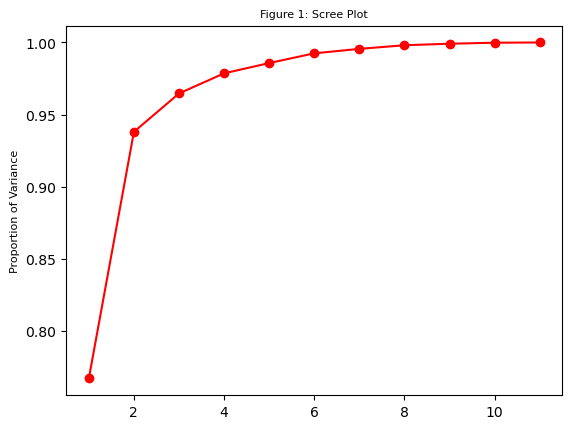

In [3]:
pca = PCA(n_components=len(models))
X_pca = pca.fit_transform(BE_data[models])

prop_var = np.cumsum(pca.explained_variance_ratio_)
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

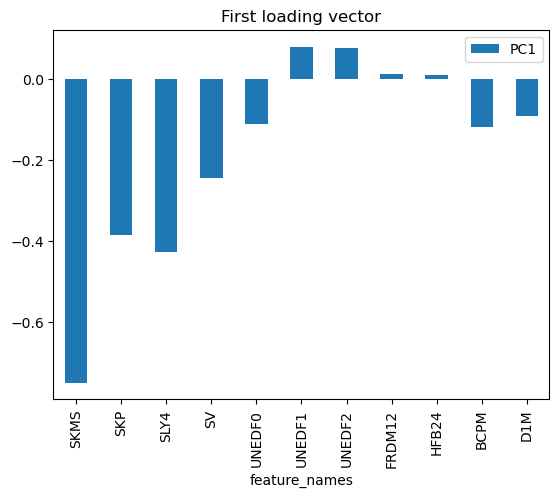

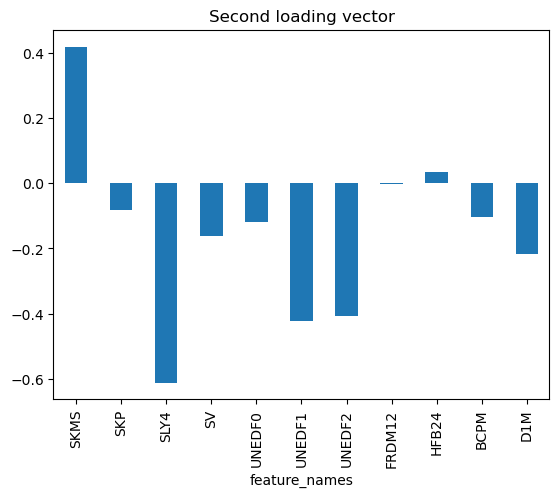

                    PC1       PC2
feature_names                    
SKMS          -0.749416  0.418792
SKP           -0.385741 -0.083731
SLY4          -0.426846 -0.611126
SV            -0.245022 -0.162337
UNEDF0        -0.111584 -0.118039
UNEDF1         0.080058 -0.423890
UNEDF2         0.076147 -0.405814
FRDM12         0.013121 -0.003518
HFB24          0.009301  0.034647
BCPM          -0.118397 -0.104251
D1M           -0.091712 -0.217698


In [4]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector")
plt.show()
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector")
plt.show()
print(loadings.iloc[:, :2])

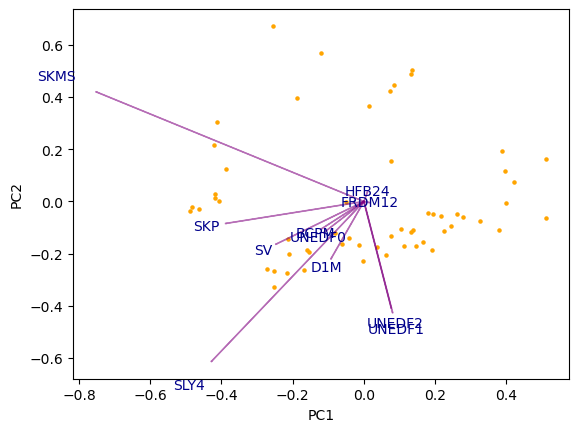

In [5]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))

# BE residual analysis - normalized

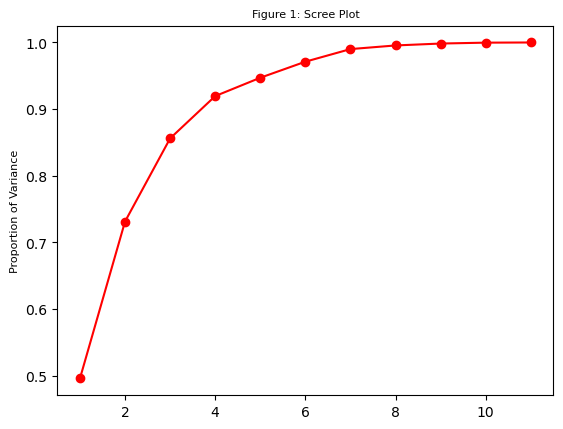

In [6]:
pca = PCA(n_components=len(models))
X_scaled = StandardScaler().fit_transform(BE_data[models])
X_pca = pca.fit_transform(X_scaled)

prop_var = np.cumsum(pca.explained_variance_ratio_)

PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

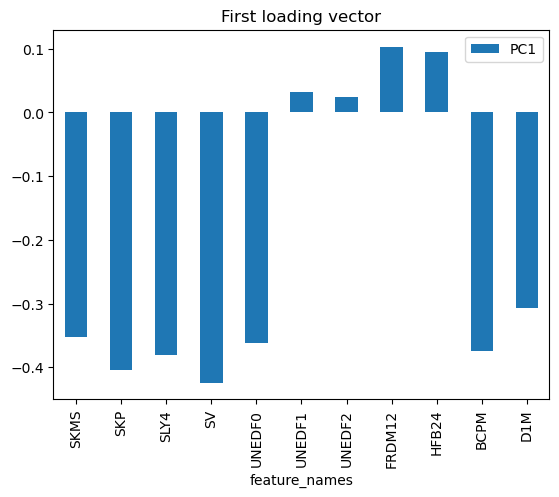

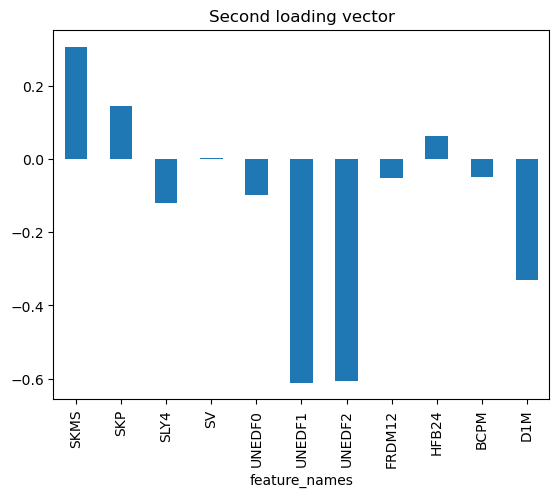

                    PC1       PC2
feature_names                    
SKMS          -0.352706  0.307014
SKP           -0.404826  0.144612
SLY4          -0.380599 -0.119981
SV            -0.424024  0.002577
UNEDF0        -0.361882 -0.098616
UNEDF1         0.031518 -0.610605
UNEDF2         0.024702 -0.607357
FRDM12         0.103461 -0.051109
HFB24          0.094774  0.062444
BCPM          -0.374355 -0.048277
D1M           -0.307689 -0.331874


In [7]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector")
plt.show()
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector")
plt.show()
print(loadings.iloc[:, :2])

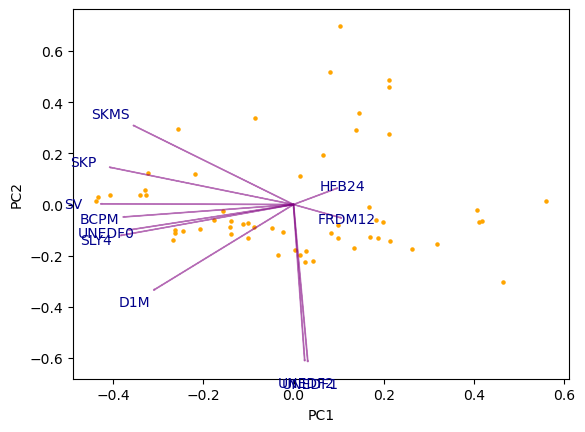

In [8]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))

# TwoPSE residual analysis - raw

In [16]:
models = ['SKMS', 'SKP', 'SLY4', 'SV', 'UNEDF0', 'UNEDF1', 'UNEDF2', 'FRDM12', 'HFB24', 'BCPM', 'D1M']
observable = "TwoPSE"
PSE_data = h5_data_loader(models, observable, residuals = True)
PSE_data = PSE_data.dropna()

print(f"\n model means: \n {PSE_data[models].mean(axis = 0)}")
print(f"\n model stds: \n {PSE_data[models].std(axis = 0)}")
print(f"\n model rmse: \n {np.sqrt(np.mean(PSE_data[models] ** 2, axis = 0))}")


 model means: 
 SKMS      2.028297
SKP       0.705092
SLY4     -0.068257
SV        0.457275
UNEDF0    0.466418
UNEDF1   -0.334413
UNEDF2   -0.299608
FRDM12    0.177423
HFB24     0.190155
BCPM      0.394178
D1M       0.067908
dtype: float64

 model stds: 
 SKMS      1.206456
SKP       0.746530
SLY4      0.684996
SV        0.634463
UNEDF0    0.823598
UNEDF1    0.471503
UNEDF2    0.513911
FRDM12    0.475258
HFB24     0.458364
BCPM      0.664603
D1M       0.640514
dtype: float64

 model rmse: 
 SKMS      2.354568
SKP       1.022098
SLY4      0.682383
SV        0.777549
UNEDF0    0.940191
UNEDF1    0.574671
UNEDF2    0.590962
FRDM12    0.503375
HFB24     0.492514
BCPM      0.767674
D1M       0.638493
dtype: float64


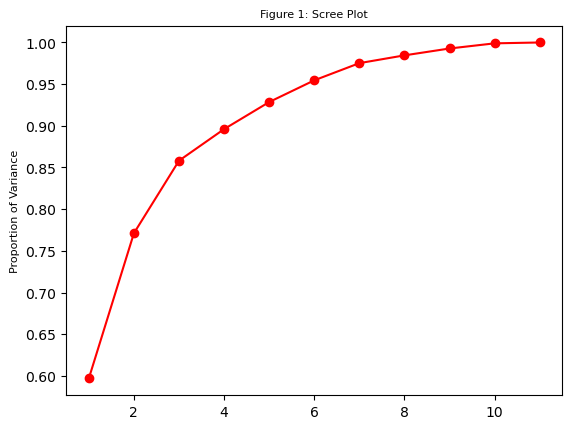

In [17]:
pca = PCA(n_components=len(models))
X_pca = pca.fit_transform(PSE_data[models])

prop_var = np.cumsum(pca.explained_variance_ratio_)
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

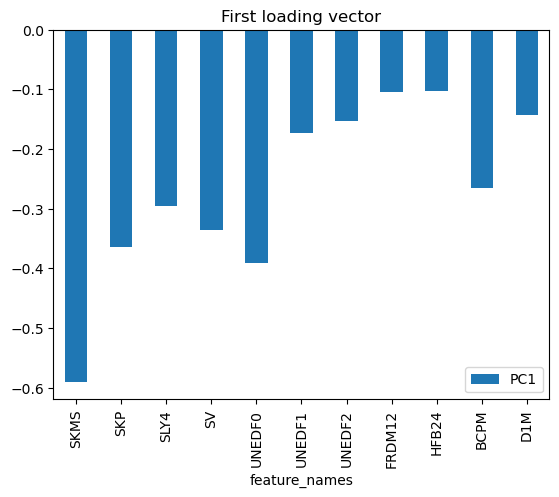

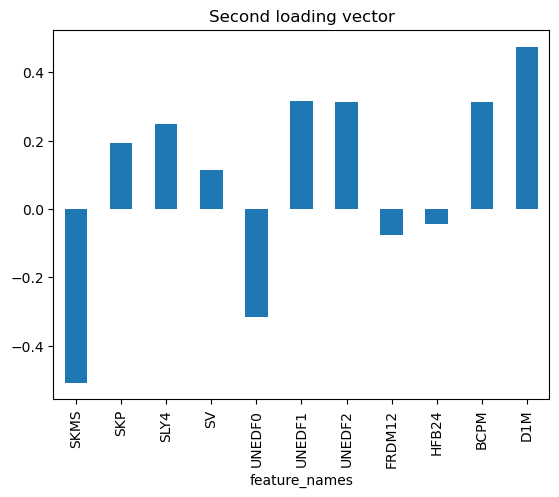

                    PC1       PC2
feature_names                    
SKMS          -0.590270 -0.507931
SKP           -0.364786  0.193349
SLY4          -0.294890  0.250019
SV            -0.336104  0.114520
UNEDF0        -0.390702 -0.317082
UNEDF1        -0.173280  0.314991
UNEDF2        -0.153096  0.313360
FRDM12        -0.104794 -0.074912
HFB24         -0.102374 -0.043320
BCPM          -0.266008  0.312013
D1M           -0.142308  0.475607


In [18]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector")
plt.show()
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector")
plt.show()
print(loadings.iloc[:, :2])

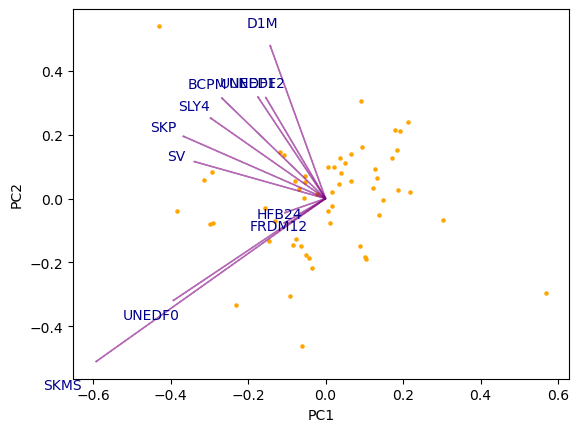

In [19]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))

# TwoPSE residual analysis - normalized

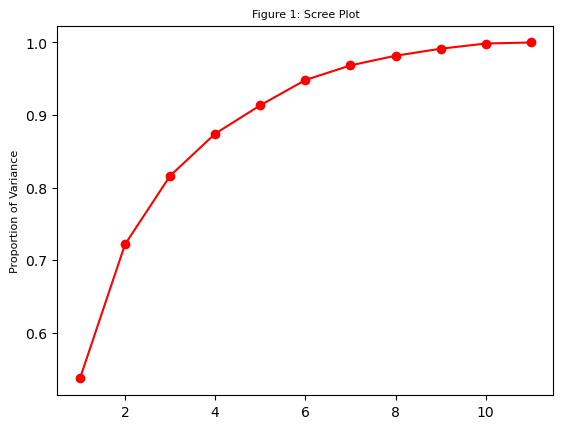

In [20]:
pca = PCA(n_components=len(models))
X_scaled = StandardScaler().fit_transform(PSE_data[models])
X_pca = pca.fit_transform(X_scaled)

prop_var = np.cumsum(pca.explained_variance_ratio_)

PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

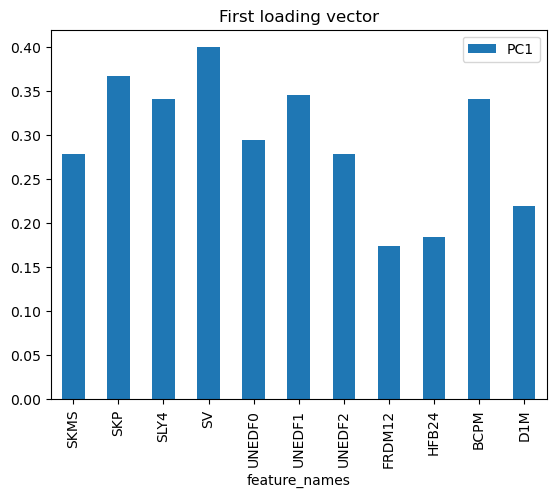

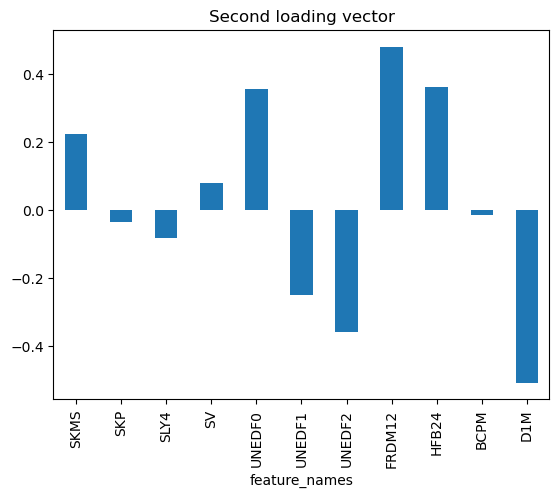

                    PC1       PC2
feature_names                    
SKMS           0.278973  0.222500
SKP            0.366641 -0.037950
SLY4           0.340958 -0.084599
SV             0.399656  0.079463
UNEDF0         0.293918  0.353561
UNEDF1         0.345185 -0.252471
UNEDF2         0.278860 -0.358919
FRDM12         0.173806  0.479575
HFB24          0.183964  0.359208
BCPM           0.340891 -0.016136
D1M            0.219569 -0.508655


In [21]:
loadings = loading_matrix(pca.components_, pca.n_features_, models)
loadings.iloc[:, :1].plot(kind = "bar", title = "First loading vector")
plt.show()
loadings.iloc[:, 1].plot(kind = "bar", title = "Second loading vector")
plt.show()
print(loadings.iloc[:, :2])

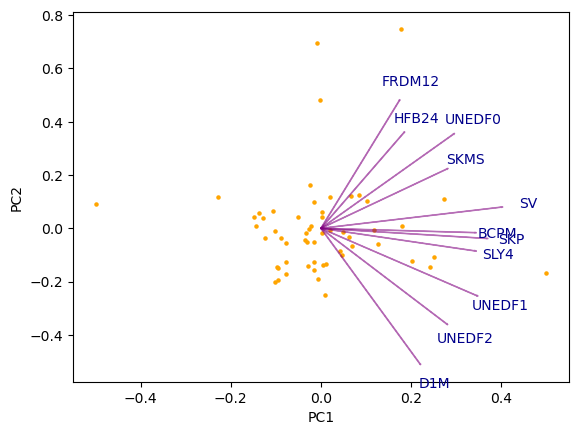

In [22]:
biplot(X_pca, np.transpose(pca.components_),list(loadings.index))